In [2]:
import numpy as np # computing
from numpy import linalg as LA # linear algebra
from scipy.integrate import odeint # ordinary differential equations
from scipy.linalg import expm # matrix exponentiation
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots

# time interval: array of integers from 0 to 5000
t = np.arange(5000) # hr

# plot settings
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
def legend():
    plt.legend(title="Tank", labels=("A","B","C","D"))

# "hollow" flow matrix. row = sink, column = source
Qh = np.array([[0,  2, 0, 6],
               [8,  0, 4, 0],
               [0, 10, 0, 2],
               [0,  0, 8, 0]]) # L/hr

# complete flow matrix. diagonal entries set so columns (axis = 0) sum to zero
Q = Qh - np.diag(Qh.sum(axis = 0)) # L/hr

# volume
v = np.array([600, 300, 3000, 6000]) # L

# initial concentration [PO4]
P0 = [3, 2, 4, 2] # umol/L

# function to set structure of b
def bio(beta, A, B):
    return beta * np.array([-A, -B, B, A])

fraction = .4

## Oxygen

In [3]:
# surface fraction of total system volume
surface_fraction = np.sum(v[:2]) / np.sum(v[2:])

# convert volumes from L to m^3
v_m3 = v / 1000

[C, D] =  [269.08940677 158.93218614]


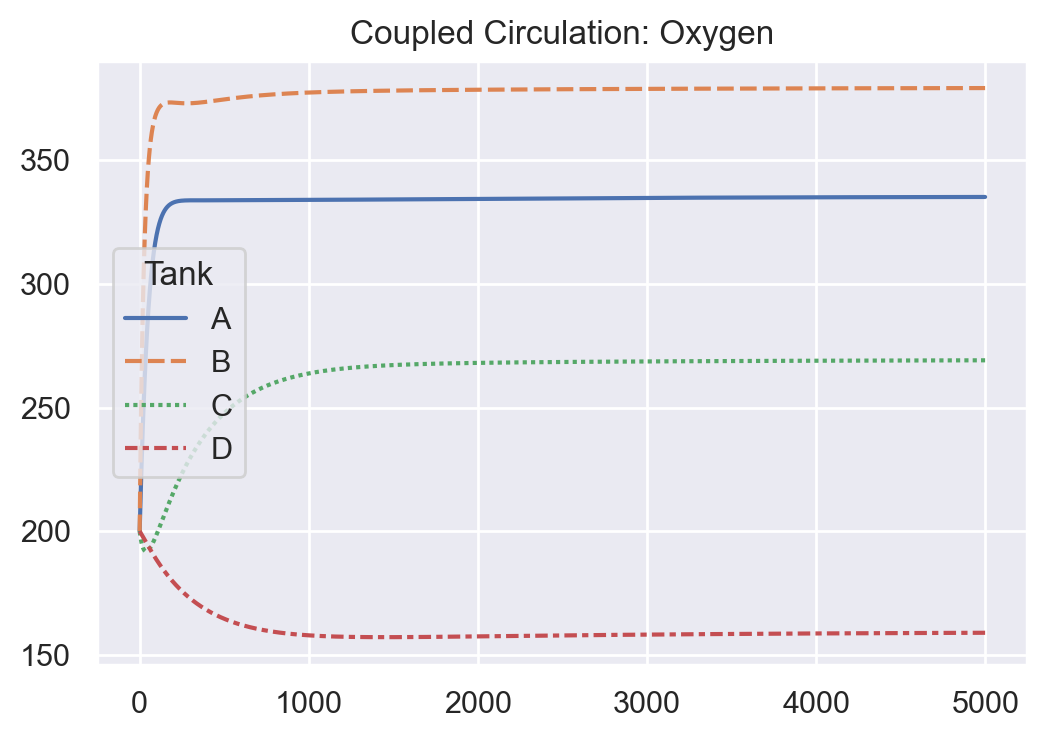

In [8]:
def sys_oxy(c, t):
    b = bio(fraction, *(Qh[:2] @ c[:4]))
    r = k_eq * np.array([c_eq - c[4], c_eq - c[5], 0, 0])
    return np.append((Q @ c[:4] + b) / v,
                     (Q @ c[4:] + R * b) / v + r)

R = -105 # Redfield ratio: O2:PO4 in photosynthesis
c_eq = 350 # surface [O2] at atmospheric equilibrium (umol/L)
k_eq = 0.01 # atmospheric equilibration rate constant (/hr)

O0 = [200, 200, 200, 200] # Initial [O2] (umol/L)

sol_oxy = odeint(sys_oxy, np.append(P0, O0), t)

sns.lineplot(data=sol_oxy[:,4:]).set(title="Coupled Circulation: Oxygen")
legend()

print("[C, D] = ", sol_oxy[-1,6:]) # deepwater oxygen concentrations